
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_4vIBwxFI37R-6llJgQeSgvRcuokJlrZpPDreNcQEkAC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-tefrvet3qatnnf'
object_key = '0.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
# A Novel Method for Handwritten Digit Recognition

In [4]:
pwd

'/home/wsuser/work'

In [5]:
!pip install tensorflow==2.7.1

     |████████████████████████████████| 495.2 MB 34 kB/s /s eta 0:00:01 | 281.1 MB 120.0 MB/s eta 0:00:02
     |████████████████████████████████| 14.1 MB 107.2 MB/s eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2


## Import the necessary packages

In [6]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

## Load Data

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Data Analysis

In [8]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

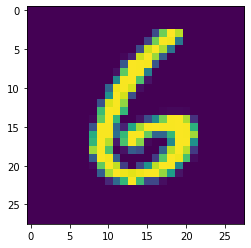

In [10]:
plt.imshow(x_train[6000])     #ploting the index=image

In [11]:
np.argmax(y_train[6000])

0

# Data Pre-Processing

## Reshaping Dataset

In [12]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

## Applying One Hot Encoding

In [13]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

## Create model

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(number_of_classes, activation="softmax"))

## Compiling the model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [19]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

## Train the model

In [20]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

NameError: name 'X_train' is not defined

## Test the model

In [21]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)   

NameError: name 'X_test' is not defined

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

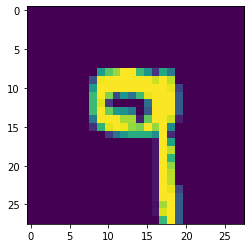

In [22]:
plt.imshow(x_test[6000])

In [23]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

NameError: name 'prediction' is not defined

In [24]:
np.argmax(y_test[6000:6001]) #printing the actual labels

0

## Save The model

In [25]:
# Save the model
model.save('mnistCNN.h5')

In [26]:
# Convert the Saved Model to a Tar Compressed Format
!tar -zcvf trainedModel.tgz mnistCNN.h5

mnistCNN.h5


In [27]:
%%bash
ls -ll

total 1544
-rw-rw---- 1 wsuser wscommon 832360 Nov 11 08:37 mnistCNN.h5
-rw-rw---- 1 wsuser wscommon 744280 Nov 11 08:37 trainedModel.tgz


## Watson Machine Learning

In [28]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 24.1 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "qQ41lQILKTfI3-w5Nh0MHx2rUdNGmvzUy4Gy_R1wOH30"
}

client = APIClient(wml_credentials)

## Save to Deployment Space

In [30]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [31]:
space_uid = guid_from_space_name(client, 'DigitRecog')
print("Space UID : ", space_uid)

Space UID :  a141186a-157b-4177-ab9b-a5a7b6df7db6


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [34]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [35]:
model_details = client.repository.store_model(model='trainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [36]:
model_id

'0da9ea23-f3dc-469d-b636-b3f0d541ff5d'

In [37]:
client.repository.download("7b3434b7-73e3-4bb3-826c-abed981ccef9", 'Digit_IBM_model.tar.gz')

Successfully saved model content to file: 'Digit_IBM_model.tar.gz'


'/home/wsuser/work/Digit_IBM_model.tar.gz'

## Test Model

In [60]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [61]:
model = load_model("mnistCNN.h5")

In [62]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_4vIBwxFI37R-6llJgQeSgvRcuokJlrZpPDreNcQEkAC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-tefrvet3qatnnf'
object_key = '15.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [63]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [64]:
img

In [65]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [66]:
pred = model.predict(im2arr)
print(pred)

[[6.0576095e-15 1.5652374e-20 1.5250433e-17 1.2076895e-23 6.3651133e-11
  1.0923814e-22 1.5309155e-21 1.0000000e+00 3.4396724e-19 3.8884598e-15]]


In [67]:
print(np.argmax(pred, axis=1)) #printing our Labels

[7]
